In [5]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
import statistics
from scipy.special import stdtr
from scipy.stats import ttest_ind, ttest_ind_from_stats
from numpy.random import seed
from numpy.random import randn
from numpy import random
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [6]:
CollegeData = pd.read_csv("DataSets/MERGED2015_16_PP.csv", na_values = ['NULL','PrivacySuppressed'])
print(CollegeData)
CollegeData.columns

C:\Users\moffa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6,9,1729,1743) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


        UNITID    OPEID  OPEID6  \
0       100654   100200    1002   
1       100663   105200    1052   
2       100690  2503400   25034   
3       100706   105500    1055   
4       100724   100500    1005   
...        ...      ...     ...   
7588  48154401  4220901   42209   
7589  48387801  4223701   42237   
7590  48400201  4228101   42281   
7591  48414501  4232401   42324   
7592  48621101  4215601   42156   

                                                 INSTNM              CITY  \
0                              Alabama A & M University            Normal   
1                   University of Alabama at Birmingham        Birmingham   
2                                    Amridge University        Montgomery   
3                   University of Alabama in Huntsville        Huntsville   
4                              Alabama State University        Montgomery   
...                                                 ...               ...   
7588  National Personal Training Institu

Index(['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP',
       'ACCREDAGENCY', 'INSTURL', 'NPCURL',
       ...
       'OMENRYP8_FTNFT', 'OMENRAP8_FTNFT', 'OMENRUP8_FTNFT', 'OMACHT6_PTNFT',
       'OMAWDP6_PTNFT', 'OMACHT8_PTNFT', 'OMAWDP8_PTNFT', 'OMENRYP8_PTNFT',
       'OMENRAP8_PTNFT', 'OMENRUP8_PTNFT'],
      dtype='object', length=1805)

Text(0.5, 0, 'Annual Cost')

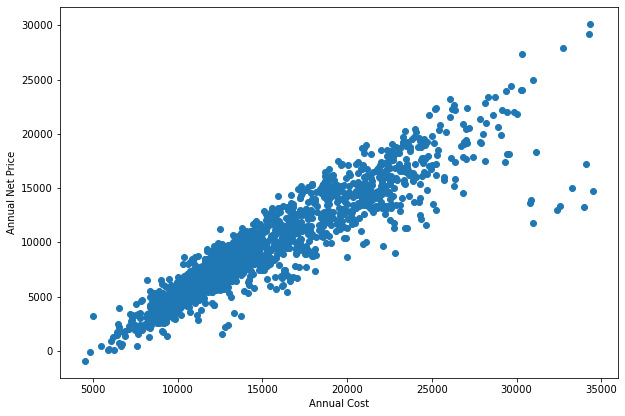

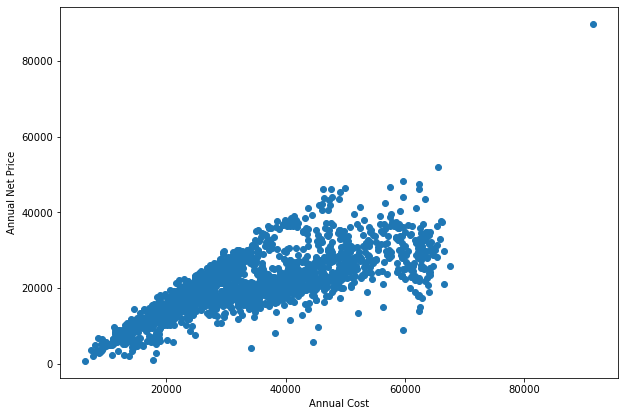

In [9]:
#Public Model
plt.figure(figsize=(10,15))
plt.subplot(211)
plt.scatter(CollegeData.COSTT4_A, CollegeData.NPT4_PUB)
plt.ylabel("Annual Net Price")
plt.xlabel("Annual Cost")

#Private Model

plt.figure(figsize=(10,15))
plt.subplot(212)
plt.scatter(CollegeData.COSTT4_A, CollegeData.NPT4_PRIV)
plt.ylabel("Annual Net Price [Private]")
plt.xlabel("Annual Cost [Private]")

In [11]:
mod1_pub = smf.ols('NPT4_PUB~COSTT4_A', data = CollegeData).fit()
mod1_pub.summary()
"""
I would say there is a significant linear relationship because of the p-value of the variable 'COSTT4_A'.
This p-value is about 0, which means the variable is significant.
The closer the value is to 0 the more significant the variable is to the predicted variable. 
About 85% of the variation can be explained by the the explanatory variable, given the R^2 value. 
""""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               NPT4_PUB   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     9236.
Date:                Thu, 14 Apr 2022   Prob (F-statistic):               0.00
Time:                        11:27:31   Log-Likelihood:                -14391.
No. Observations:                1615   AIC:                         2.879e+04
Df Residuals:                    1613   BIC:                         2.880e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2880.7692    137.743    -20.914      0.000   -3150.944   -2610.595
COSTT4_A       0.8246      0.009     96.105      0.000       0.808       0.841
==============================================================================
Omnibus:                      430.820   Durbin-Watson:                   1.160
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2386.264
Skew:                          -1.132   Prob(JB):                         0.00
Kurtosis:                       8.508   Cond. No.                     4.95e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
mod1_priv = smf.ols('NPT4_PRIV~COSTT4_A', data = CollegeData).fit()
mod1_priv.summary()

"""
I would say there is a significant linear relationship because of the p-value of the variable 'COSTT4_A'.
This p-value is about 0, which means the variable is significant.
The closer the value is to 0 the more significant the variable is to the predicted variable. 
About 50% of the variation can be explained by the the explanatory variable, given the R^2 value. 
""""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              NPT4_PRIV   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     2372.
Date:                Thu, 14 Apr 2022   Prob (F-statistic):               0.00
Time:                        11:29:42   Log-Likelihood:                -22981.
No. Observations:                2304   AIC:                         4.597e+04
Df Residuals:                    2302   BIC:                         4.598e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7730.1767    297.175     26.012      0.000    7147.417    8312.936
COSTT4_A       0.4132      0.008     48.707      0.000       0.397       0.430
==============================================================================
Omnibus:                      184.566   Durbin-Watson:                   1.533
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              767.149
Skew:                           0.282   Prob(JB):                    2.60e-167
Kurtosis:                       5.770   Cond. No.                     9.61e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
#Levels show how much you increase from Level 1 to Level 2; Level 1 to Level 3 

mod2_pub = smf.ols('NPT4_PUB~COSTT4_A + C(ICLEVEL)', data = CollegeData).fit()
mod2_pub.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               NPT4_PUB   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     3104.
Date:                Thu, 14 Apr 2022   Prob (F-statistic):               0.00
Time:                        11:29:53   Log-Likelihood:                -14385.
No. Observations:                1615   AIC:                         2.878e+04
Df Residuals:                    1611   BIC:                         2.880e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -3423.4638    230.313    -14.864      0.000   -3875.209   -2971.719
C(ICLEVEL)[T.2]   346.1164    121.129      2.857      0.004     108.529     583.704
C(ICLEVEL)[T.3]  1058.7193    399.896      2.647      0.008     274.348    1843.091
COSTT4_A            0.8466      0.011     74.046      0.000       0.824       0.869
==============================================================================
Omnibus:                      454.049   Durbin-Watson:                   1.161
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2719.665
Skew:                          -1.175   Prob(JB):                         0.00
Kurtosis:                       8.907   Cond. No.                     1.46e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
"""
From the intial look at the p-values I can see that all of these variables are going to be siginificant because all of the p-value are low.
The 'ICLEVEL 2' variable says that moving from Level 1 to Level 2 will result in a change of 346.11 on average for each 'x' increase
THe 'ICLEVEL 3' variable states that moving from Level to Level 3 will result in a change of 1058.71 on average for each increase in 'x'.
The coeffecient for COSTT4_A says that each moving in 'x' will change y by .84 (I believe this variable has been scaled down to fit in the plot. )
 
"""